<a href="https://colab.research.google.com/github/bavilaa/adv_ml/blob/master/Assignment1_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Pandas

import pandas as pd

#Activating Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Ploting

%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


Instructions:

Your final report should be written up in a Jupyter notebook.  It should be posted to a public Github repo as an ipynb AND it should be saved as an html file and submitted to this assignment via courseworks.  Please include the link to your Github repo in this html file.

Note: We used countries as a categorical variable during our in class mini-hackathon.   This variable actually is categorical at the observation level.  Suffice it to say, in practice we do not really want to build a categorical variable using a variable that has as many categories as it we have observations in our dataset. 

Before building your model replace the variable denoting country names with a new variable denoting world regions.  Here is a dataset you can use to merge in this data: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv (Links to an external site.)

Feel free to use R, Excel, or your preferred program to update your csv file before building your model.    You are welcome, but not required, to add any other country level features you would like to your dataset before using the data to complete your report. 

Your report should include the following information:

Explore bivariate results (Use visualizations!)
Describe any relationships you see between particular features and the target variable
Examine features that predict happiness categories using one or more models that allow for automatic feature selection
Explain any meaningful findings
Run at least three prediction models to try to predict World Happiness well.
Discuss which models performed better and point out relevant hyper-parameter values for successful models.
Submit your best model to the leader board for the World Happiness AI Model Share competition.
You have the option to discuss these models in your report, but it is not required.

In [0]:
#Loading the data:

In [0]:
route = '/content/drive/My Drive/Colab Notebooks/Adv.ML/'
bd_name =  "worldhappiness2019.csv"

In [0]:
df = pd.read_csv(route + bd_name)

regiondata=pd.read_csv(route+ "all.csv")

In [6]:
df.head(2)

,Happiness_level,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Very High,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,Very High,Denmark,1.383,1.573,0.996,0.592,0.252,0.410


In [7]:

mergedata=pd.merge(df, regiondata, how='left', left_on='Country or region', right_on='name')
# Check for missing values (there won't be any given that I have already cleaned up the region data)
mergedata.loc[pd.isnull(mergedata).iloc[:,9]].to_csv("missing.csv",index=False)

# clean up final region data
X=mergedata.drop(['Happiness_level'],axis=1)
X=X.drop(['name'],axis=1)
X=X.drop(['Country or region'],axis=1)
X=X.drop(['sub-region'],axis=1)

X.head(2)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,alpha-2,alpha-3,country-code,iso_3166-2,region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,1.340,1.587,0.986,0.596,0.153,0.393,FI,FIN,246.0,ISO 3166-2:FI,Europe,NaN,150.0,154.0,NaN
1,1.383,1.573,0.996,0.592,0.252,0.410,DK,DNK,208.0,ISO 3166-2:DK,Europe,NaN,150.0,154.0,NaN


In [0]:
# Set up training and test data
from sklearn.model_selection import train_test_split

#y=mergedata['Happiness_level']
#X=data.drop(['Happiness_level'],axis=1)
X = mergedata

X=X.drop(['name'],axis=1)
X=X.drop(['Country or region'],axis=1)
X=X.drop(['sub-region'],axis=1)
#X=X.drop(['alpha-1'],axis=1)
X=X.drop(['alpha-2'],axis=1)
X=X.drop(['alpha-3'],axis=1)
X=X.drop(['country-code'],axis=1)
X=X.drop(['iso_3166-2'],axis=1)
X=X.drop(['intermediate-region'],axis=1)
X=X.drop(['region-code'],axis=1)
X=X.drop(['sub-region-code'],axis=1)
X=X.drop(['intermediate-region-code'],axis=1)

#Manual enconding:

happy_dict = {"Very High": 5, "High": 4 ,"Average":3 , "Low" : 2 , "Very Low" :1}
X['hap_num'] = X['Happiness_level'].replace(happy_dict)
X['hap_num'] = X['hap_num'].astype('float64')
X.head(2)


y2=X['hap_num']
y=X['Happiness_level']
			


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=42)

#Plot all variables v/s GDP

<Figure size 2880x2880 with 0 Axes>

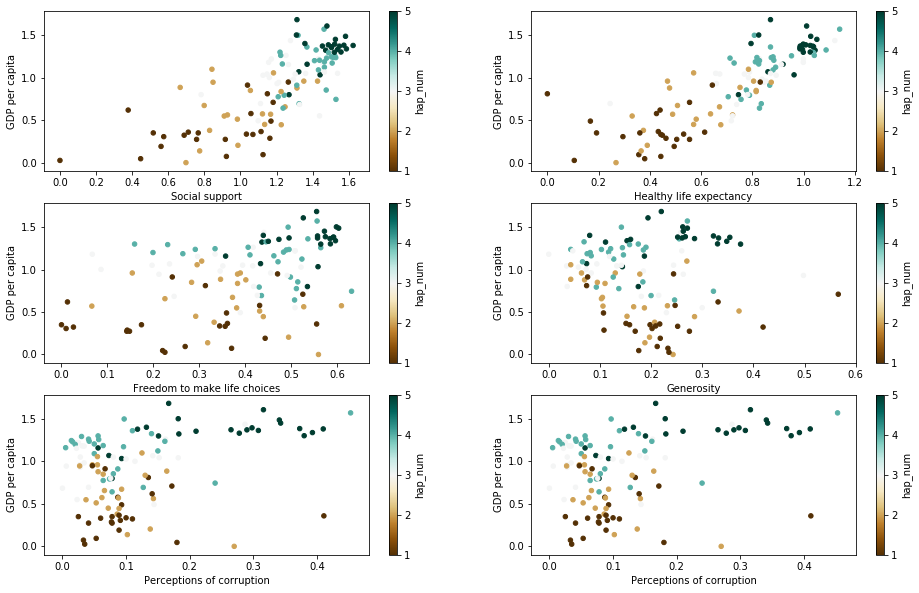

In [9]:
import matplotlib.pyplot as plt

y_variable =  'GDP per capita'
x_variable = 'Social support'




fig = plt.figure()

fig.set_figheight(40)
fig.set_figwidth(40)


fig, axes = plt.subplots(nrows=3, ncols=2)
X_train.plot.scatter(x=x_variable,
                      y=y_variable,
                      c='hap_num',
                      colormap='BrBG',
                       figsize=(16,10),
                       ax=axes[0,0])

y_variable =  'GDP per capita'
x_variable = 'Healthy life expectancy'
X_train.plot.scatter(x=x_variable,
                      y=y_variable,
                      c='hap_num',
                      colormap='BrBG',
                       figsize=(16,10),
                       ax=axes[0,1])


y_variable =  'GDP per capita'
x_variable = 'Freedom to make life choices'
X_train.plot.scatter(x=x_variable,
                      y=y_variable,
                      c='hap_num',
                      colormap='BrBG',
                       figsize=(16,10),
                       ax=axes[1,0])


y_variable =  'GDP per capita'
x_variable = 'Generosity'
X_train.plot.scatter(x=x_variable,
                      y=y_variable,
                      c='hap_num',
                      colormap='BrBG',
                       figsize=(16,10),
                       ax=axes[1,1])

y_variable =  'GDP per capita'
x_variable = 'Perceptions of corruption'
X_train.plot.scatter(x=x_variable,
                      y=y_variable,
                      c='hap_num',
                      colormap='BrBG',
                       figsize=(16,10),
                       ax=axes[2,0])


y_variable =  'GDP per capita'
x_variable = 'Perceptions of corruption'
X_train.plot.scatter(x=x_variable,
                      y=y_variable,
                      c='hap_num',
                      colormap='BrBG',
                       figsize=(16,10),
                       ax=axes[2,1])

#ax.set_xlabel(x_variable)
#ax.set_ylabel(y_variable)
plt.show()

-GDP percapita has a great prediction power, countries with high(low) GDP are more happy (unhappy).

-Social Support: simillar as GDP, however less than GDP, but is possible to see that countries high social support are more happy.

-

[Text(0.5, 0, 'Generosity')]

<Figure size 2880x2880 with 0 Axes>

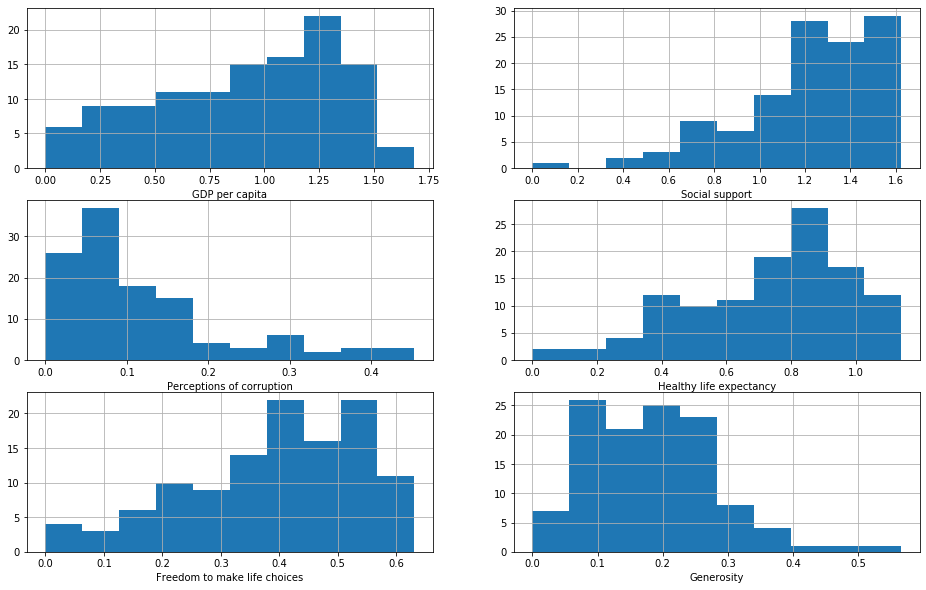

In [10]:
fig = plt.figure()

fig.set_figheight(40)
fig.set_figwidth(40)
fig, axes = plt.subplots(nrows=3, ncols=2)

x_variable = 'GDP per capita'
X_train[x_variable].hist(ax=axes[0,0],figsize=(16,10))


axes[0,0].set(xlabel=x_variable)

x_variable = 'Social support'
X_train[x_variable].hist(ax=axes[0,1],figsize=(16,10))

axes[0,1].set(xlabel=x_variable)

x_variable = 'Perceptions of corruption'
X_train[x_variable].hist(ax=axes[1,0],figsize=(16,10))

axes[1,0].set(xlabel=x_variable)

x_variable = 'Healthy life expectancy'
X_train[x_variable].hist(ax=axes[1,1],figsize=(16,10))

axes[1,1].set(xlabel=x_variable)

x_variable = 'Freedom to make life choices'
X_train[x_variable].hist(ax=axes[2,0],figsize=(16,10))

axes[2,0].set(xlabel=x_variable)

x_variable = 'Generosity'
X_train[x_variable].hist(ax=axes[2,1],figsize=(16,10))

axes[2,1].set(xlabel=x_variable)









#Preprocess data using Column Transformer and save fit preprocessor to ".pkl" file


In [0]:
X_train = X_train.drop('Happiness_level',axis=1)
X_train = X_train.drop('hap_num',axis=1)



In [0]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features=X_train.columns.tolist()
numeric_features.remove('region')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region']

#replacing missing to avoid errors
#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


#Fit your preprocessor object
prediction_input_preprocessor=preprocessor.fit(X_train) 

#Pickle is a way to save objects to file in python
import pickle
pickle.dump(prediction_input_preprocessor, open( "preprocessor.pkl", "wb" ) )

#Examine features that predict happiness categories using one or more models that allow for automatic feature selection



In [13]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lassomodel = Lasso(alpha=0.5).fit(prediction_input_preprocessor.transform(X_train), y2_train)
model = SelectFromModel(lassomodel, prefit=True) # prefit argument allows non zero features to be chosen
                                                 # from regularized models like lasso
    
X_new = model.transform(prediction_input_preprocessor.transform(X_train)) # transform data to insert into new model

print(lassomodel.coef_)
print(X_new.shape) #down to four variables from 13

[ 0.34047092  0.15156092  0.21513933  0.          0.          0.
 -0.          0.         -0.          0.          0.        ]
(117, 3)


####The variables GDP per capital, Healthy life expectancy and Social support are the variables selected by the Lasso model.This is Similar to the findings using the scatter plots where these variables are linear dependent on GDP.
#### In the other variables like Generosity or Freedom to make life choices these are not selected by the lasso model, in the scatter plots at the same level of these variables we can see different levels of happiness, which can be understood as little prediction power

#### The new variable Region encoded using one hot was not selected by lasso. 


In [14]:
X_train.head(1)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
26,0.8,1.269,0.746,0.535,0.175,0.078,Americas


#Model 1: SVC



In [0]:
# First function to evaluate the models:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata

#model_eval_metrics( y_test,predicted_labels,classification="TRUE")

In [16]:
#### New model , support vector classifier:


from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=model.predict(prediction_input_preprocessor.transform(X_test))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy on Test Data:",metrics.accuracy_score(y_test, y_pred))

print("support vector classifier's cross validation accuracy:", np.mean(cross_val_score(model, prediction_input_preprocessor.transform(X_train), y_train, cv=10)))
print("support vector classifier's Test-Data prediction accuracy: {:.5f}".format(model.score(prediction_input_preprocessor.transform(X_test), y_test)))

support vector classifier's cross validation accuracy: 0.5234848484848484
support vector classifier's Test-Data prediction accuracy: 0.41026


/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svclassifier = SVC(kernel='linear')
svclassifier.fit(prediction_input_preprocessor.transform(X_train), y_train)

#[['GDP per capita','Healthy life expectancy','Social support']]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
modelevalobject=model_eval_metrics(y_test,y_pred,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.410256,0.419679,0.503571,0.425,0,0,0,0


# MODEL 2 : Random forest Classifier

In [19]:
from numpy import loadtxt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Random Forest Model
model=RandomForestClassifier(n_estimators=1000, random_state = 0)
#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=model.predict(prediction_input_preprocessor.transform(X_test))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy on Test Data:",metrics.accuracy_score(y_test, y_pred))

print("Random Forest Classifier's cross validation accuracy:", np.mean(cross_val_score(model, prediction_input_preprocessor.transform(X_train), y_train, cv=10)))
print("Random Forest Classifier's Test-Data prediction accuracy: {:.5f}".format(model.score(prediction_input_preprocessor.transform(X_test), y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


Random Forest Classifier's cross validation accuracy: 0.5818181818181818
Random Forest Classifier's Test-Data prediction accuracy: 0.41026


/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [20]:
from sklearn.model_selection import GridSearchCV


param_grid = {'n_estimators': np.arange(500, 3000,500 )} #np.arange creates sequence of numbers for each k value

grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
grid.fit(prediction_input_preprocessor.transform(X_train), y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(prediction_input_preprocessor.transform(X_test), y_test)))

best mean cross-validation score: 0.591
best parameters: {'n_estimators': 2500}


/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


test-set score: 0.410


In [21]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Random Forest Model
model=RandomForestClassifier(n_estimators=1500, random_state = 0)
#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=model.predict(prediction_input_preprocessor.transform(X_test))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy on Test Data:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [22]:
modelevalobject=model_eval_metrics(y_test,y_pred,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.384615,0.397424,0.477381,0.391667,0,0,0,0


# 3 Neural Network:

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))


#Softmax for multiple categories, sig for only two categories.
model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
 
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
model.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train), 
               batch_size = 20, 
               epochs = 300, validation_split=0.1)  


Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 105 samples, validate on 12 samples
Epoch 1/300





105/105 [==============================] - 0s 4ms/step - loss: 1.5886 - acc: 0.2095 - val_loss: 1.6210 - val_acc: 0.0833
Epoch 2/300
105/105 [==============================] - 0s 134us/step - loss: 1.5844 - acc: 0.2095 - val_loss: 1.6189 - val_acc: 0.0833
Epoch 3/300
105/105 [==============================] - 0s 124us/step - loss: 1.5803 - acc: 0.2190 - val_loss: 1.6174 - val_acc: 0.0833
Epoch 4/300
105/105 [==============================] - 0s 146us/step - loss: 1.5759 - acc: 0.2000 - val_loss: 1.6159 - val_acc: 0.0833
Epoch 5/300
105/105 [==============================] - 0s 156us/step - loss: 1.5718 - acc: 0.2000 - val_loss: 1.6128 - val_acc: 0.0833
Epoch 6/300
105/105 [==============================] - 0s 127us/step - loss: 1.5677 - acc: 0.2000 - val_loss: 1.6113 - val_acc: 0.0833
Epoch 7/300
105/105 [===================

In [24]:
# using predict_classes() for multi-class data to return predicted class index.

print(model.predict_classes(prediction_input_preprocessor.transform(X_test)))

prediction_index=model.predict_classes(prediction_input_preprocessor.transform(X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Function to use to return label from column index location
def index_to_label(labels,index_n): 
    return labels[index_n]
    
# Example: return label at predicted index location 1
index_to_label(labels,1)

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 1 0 1 4 1 4 0 1 2 1 2 3 2 1 1 4 4 2 0 4 3 1 3 1 4 0 1 1 4 1 2 1 4 4 4 4
 2 1]
['High', 'High', 'Average', 'High', 'Very Low', 'High', 'Very Low', 'Average', 'High', 'Low', 'High', 'Low', 'Very High', 'Low', 'High', 'High', 'Very Low', 'Very Low', 'Low', 'Average', 'Very Low', 'Very High', 'High', 'Very High', 'High', 'Very Low', 'Average', 'High', 'High', 'Very Low', 'High', 'Low', 'High', 'Very Low', 'Very Low', 'Very Low', 'Very Low', 'Low', 'High']


/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [25]:
model_eval_metrics( y_test,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.384615,0.386535,0.484545,0.425,0,0,0,0


#Comments about the models:
The accuracy of the 3 models is low (less than 0.5), it means that all these models have little prediction power.
The model with the best prediction power is the Neural Network, however, the result is very similar to the random forest. In the random forest classifier even using Gridsearch the final result is still low.

One way that these models could be improved is transforming the categorical variable of happiness into an ordinal variable because even when we don't know the distance between the levels of happiness we know that very happy is closer to happy than very unhappy.